# Object-Oriented Random Walk

Let's implement a random walk similar to the exercise in HW 1, but using object-oriented programming. We will: 

- Create an RW class that simulates a random walker moving "forward" or "backward" with equal probability. 
- Implement *iteration* for this class. 
- See a highly efficient approach using generators. 

In [35]:
# class definition here

import random
from matplotlib import pyplot as plt

# class with instance variables for current position and history of positions 
# as instance variables

class random_walk:
    """
    docstring here! 
    """
    
    def __init__(self):
        self.position = 0
        self.history  = [self.position]
        
    def move(self):
        
        # pick a random direction
        direction = random.choice([-1, 1])
        
        # update current position and history
        # self.position = self.position + direction
        self.position += direction
        
        self.history.append(self.position)

    def multimove(self, k_steps=1):
        """
        take a user-specified number of self.move()'s
        """
        for i in range(k_steps):
            self.move()
        
    def plot(self):
        plt.plot(self.history)
        
    def __iter__(self):
        
        # strategy 1: implement rw_iterator and return it here
        # strategy 2: ??
        return iter(self.history)

In [34]:
L = [0, 1, 2]
L.__iter__()
iter(L)

In [36]:
rw = random_walk()

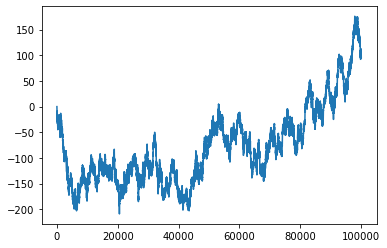

In [27]:
rw.multimove(100000)
rw.plot()

## Iteration

Now let's make it possible to loop through the positions of our random walk. For example: 

```python
rw = random_walk()
rw.multimove(5)

for i in rw:
    print(i)
```
```
# printed output
0
1
0
-1
0
1
```

In [38]:
rw = random_walk()
rw.multimove(5)

for i in rw:
    print(i)

0
-1
-2
-1
-2
-3


In [ ]:
# need rw to have an __iter__() magic method
# need output of rw.__iter__() to have a __next__() method. 

## Random Walk Generator

The primary benefit of this generator over the approach above is that we don't store the entire history of the walk in memory (although our solution above can be modified to avoid that). Another benefit is that it's much simpler to write! 

In [40]:
# RW generator
def rw_generator(k_steps = 1):
    position = 0
    yield position
    for i in range(k_steps): 
        position += random.choice([-1, 1])
        yield position

In [42]:
for i in rw_generator(k_steps = 10):
    print(i)

0
1
0
-1
0
1
0
-1
-2
-1
-2


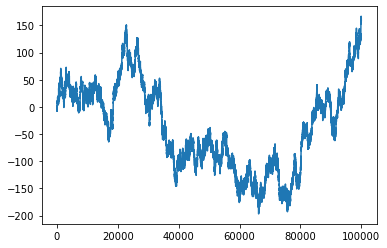

In [44]:
# generators can be "unpacked" as lists when needed. 
# so, we can plot them! 
# this takes away the memory advantage though =(
plt.plot(list(rw_generator(k_steps = 100000)))